БВТ2201 Шамсутдинов Рустам

Лабораторная работа № 4


In [157]:
import math
import random
import matplotlib.pyplot as plt


In [158]:
def t_normal(k1, k2, k3, k4):
    k1 = random.uniform(0,k1) 
    k2 = random.uniform(0,k2)
    k3 = random.uniform(0,k3)
    k4 = random.uniform(0,k4)


    return k1+k2+k3+k4

In [159]:
def mathematical_expectation(values, N):
    return sum(values) / N

In [160]:
def disspersion(values, N):
    
    M = mathematical_expectation(values, N)
    sum_sq = sum([x**2 for x in values])

    D = (sum_sq / N - M ** 2) * N / (N - 1)

    return D

In [161]:
def sqrt_mean_error(values, N):
    D = disspersion(values, N)

    return math.sqrt(D)

In [162]:
def GetFreqData(values, A, B, IntervalsCount):

    dY = (B - A) / IntervalsCount
    Freq = [0] * IntervalsCount

    for j in range(len(values)):
        
        Yc = values[j]
        FN = math.floor(Yc / dY)
        Freq[FN] += 1

    for i in range(IntervalsCount):
        Freq[i] = Freq[i] / (len(values) * dY)

    return Freq




In [163]:
def theoretical_mathematical_expectation(k1, k2, k3, k4):
    M = ((k1 + 0) / 2) + ((k2 + 0) / 2) + ((k3 + 0) / 2) + ((k4 + 0) / 2)

    return M

In [164]:
def theoretical_dispersion(k1, k2, k3, k4):

    D = ((k1 - 0)**2 / 12) + ((k2 - 0)**2 / 12) + ((k3 - 0)**2 / 12) + ((k4 - 0)**2 / 12)
    
    return D

In [165]:
def theoretical_sqrt_mean_error(k1, k2, k3, k4):

    D = theoretical_dispersion(k1, k2, k3, k4)

    return math.sqrt(D)

In [166]:
def theoretical_distribution_density(x, M, SME):

    power = -0.5 * ((x - M) / SME) ** 2

    f = math.exp(power) / (SME * math.sqrt(2 * math.pi)) 

    return f
    

In [167]:

def draw_histogram_and_pdf(left_boundary, right_boundary, IntervalsCount, relative_frequencies, SME_theory, M_theory, SME, M):

    bins = [left_boundary + (i * (right_boundary - left_boundary) / IntervalsCount) for i in range(IntervalsCount + 1)]
    bar_width = (right_boundary - left_boundary) / IntervalsCount
    x_positions = [bins[i] for i in range(IntervalsCount)]


    plt.figure(figsize=(12, 6))


    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Гистограмма")
    
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_values = [theoretical_distribution_density(x=x, M=M, SME=SME) for x in x_values]
  
    plt.plot(x_values, y_values, color='blue', label="ФПВ")

    x_value = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_value = [theoretical_distribution_density(x=x, M=M_theory, SME=SME_theory) for x in x_values]
  
    plt.plot(x_value, y_value, color='red', label="Теоретическая ФПВ")

    plt.title("Гистограмма и ФПВ")
    plt.xlabel("Случайное число")
    plt.ylabel("Относительная частота / Плотность ")
    plt.legend()

    plt.show()

Случай для N = 10

Сопоставление теоретических и практических результатов:

Математическое ожидание: Практическое = 7.2043, Теоретическое = 6.5000
Дисперсия: Практическое = 3.6167, Теоретическое = 5.2500
Среднеквадратическая ошибка: Практическое = 1.9018, Теоретическое = 2.2913


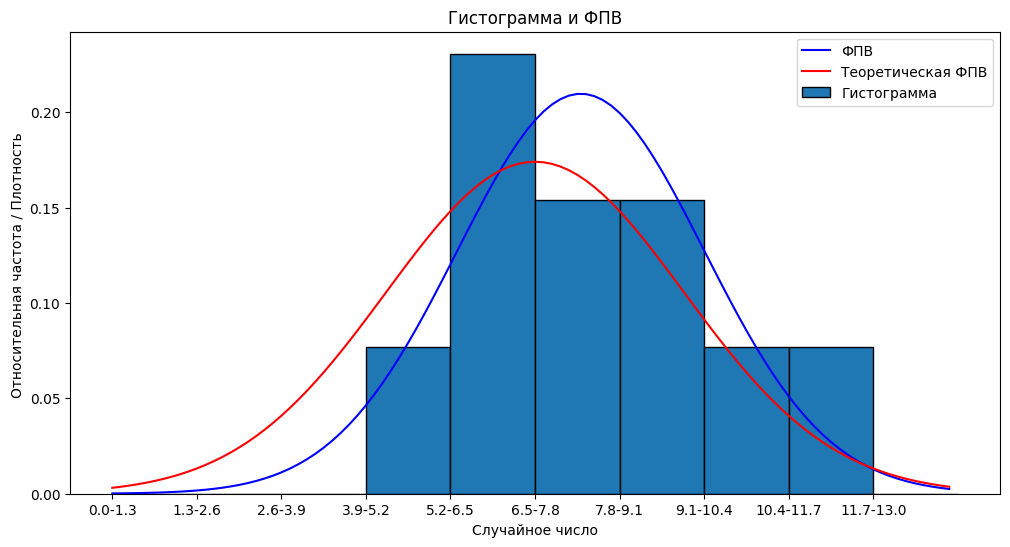

Случай для N = 20

Сопоставление теоретических и практических результатов:

Математическое ожидание: Практическое = 7.5170, Теоретическое = 6.5000
Дисперсия: Практическое = 4.7148, Теоретическое = 5.2500
Среднеквадратическая ошибка: Практическое = 2.1714, Теоретическое = 2.2913


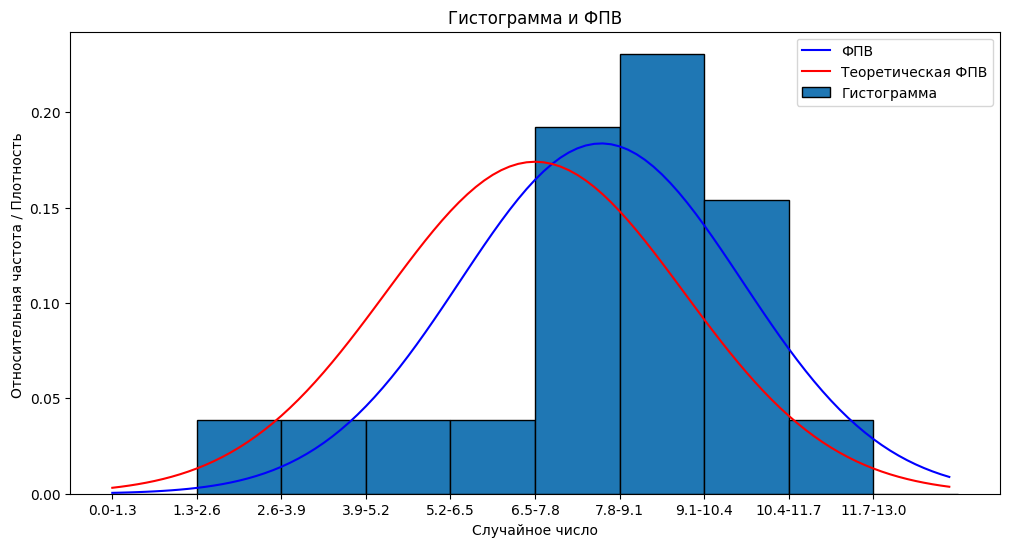

Случай для N = 50

Сопоставление теоретических и практических результатов:

Математическое ожидание: Практическое = 6.7880, Теоретическое = 6.5000
Дисперсия: Практическое = 5.1722, Теоретическое = 5.2500
Среднеквадратическая ошибка: Практическое = 2.2742, Теоретическое = 2.2913


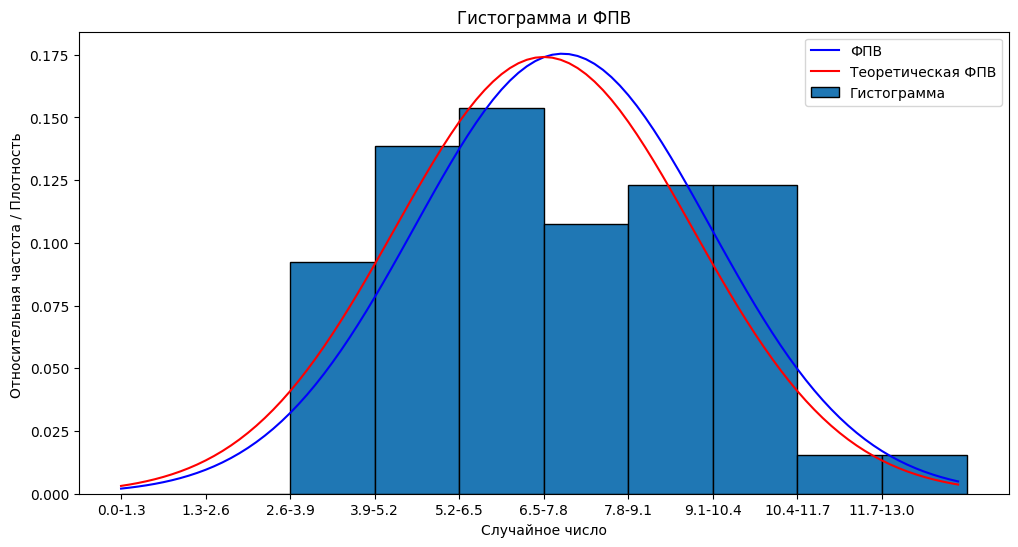

Случай для N = 100

Сопоставление теоретических и практических результатов:

Математическое ожидание: Практическое = 6.2005, Теоретическое = 6.5000
Дисперсия: Практическое = 5.5636, Теоретическое = 5.2500
Среднеквадратическая ошибка: Практическое = 2.3587, Теоретическое = 2.2913


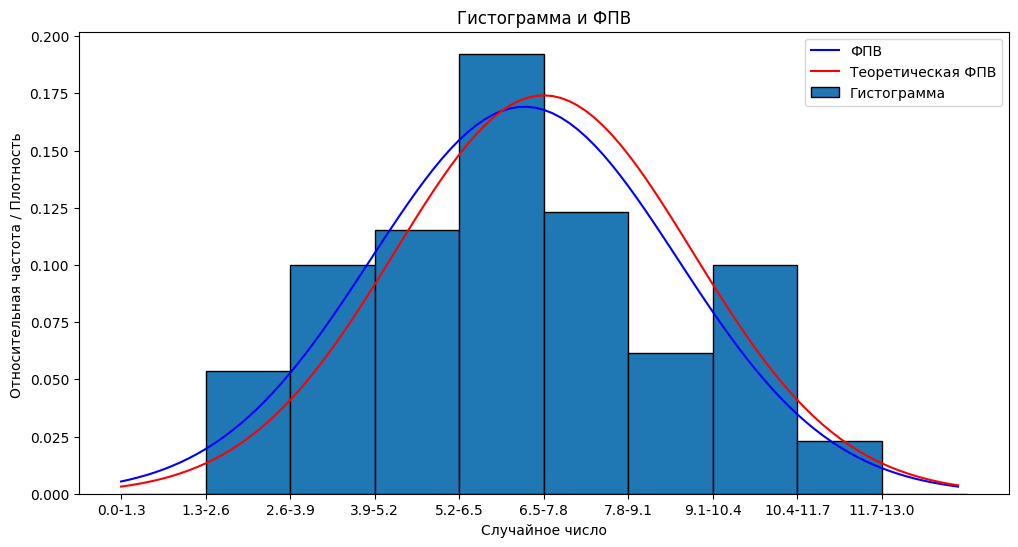

Случай для N = 200

Сопоставление теоретических и практических результатов:

Математическое ожидание: Практическое = 6.3221, Теоретическое = 6.5000
Дисперсия: Практическое = 5.6849, Теоретическое = 5.2500
Среднеквадратическая ошибка: Практическое = 2.3843, Теоретическое = 2.2913


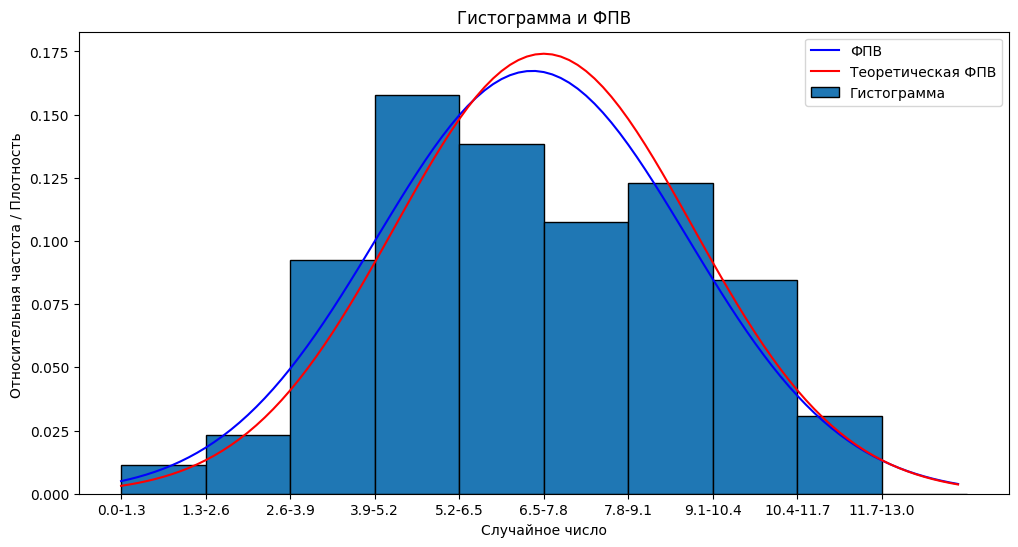

Случай для N = 500

Сопоставление теоретических и практических результатов:

Математическое ожидание: Практическое = 6.4546, Теоретическое = 6.5000
Дисперсия: Практическое = 4.9831, Теоретическое = 5.2500
Среднеквадратическая ошибка: Практическое = 2.2323, Теоретическое = 2.2913


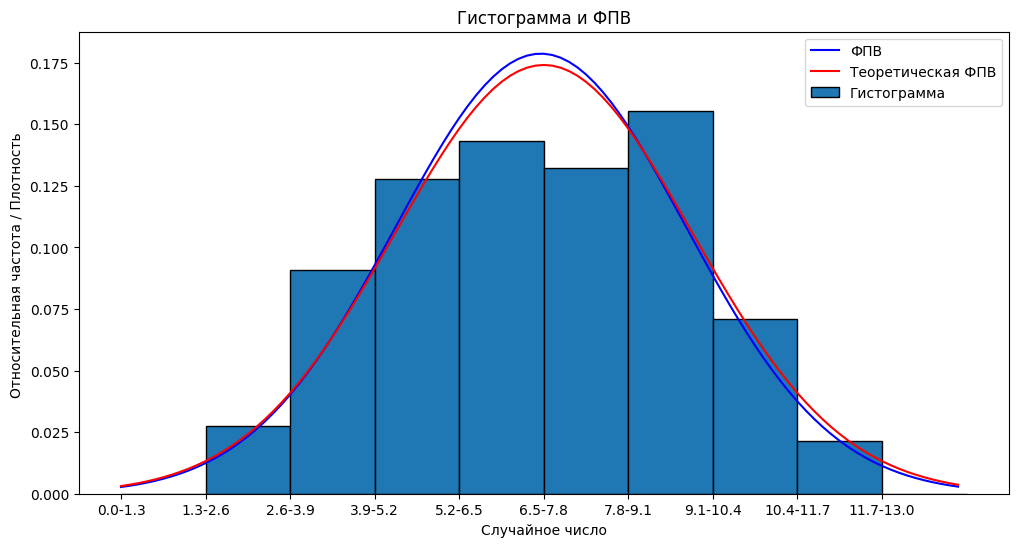

Случай для N = 1000

Сопоставление теоретических и практических результатов:

Математическое ожидание: Практическое = 6.3457, Теоретическое = 6.5000
Дисперсия: Практическое = 5.2314, Теоретическое = 5.2500
Среднеквадратическая ошибка: Практическое = 2.2872, Теоретическое = 2.2913


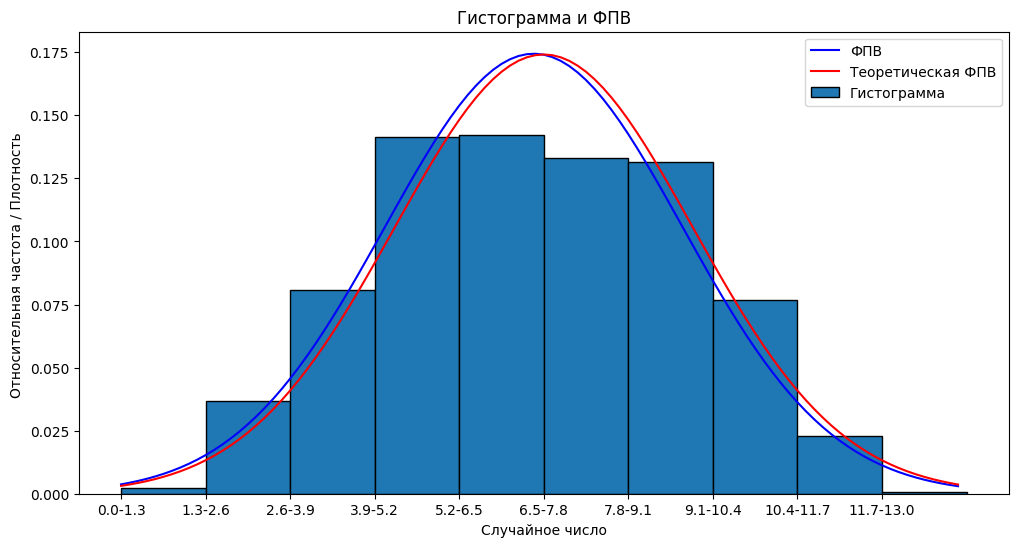

In [168]:
k1 = 2
k2 = 1
k3 = 7
k4 = 3

N_values= [10, 20, 50, 100, 200, 500, 10**3]

for N in N_values:

    random_values = []

    for _ in range(N):

        random_value = t_normal(k1, k2, k3, k4)
        random_values.append(random_value)

    M = mathematical_expectation(random_values, N)
    D = disspersion(random_values, N)
    SME = sqrt_mean_error(random_values, N)

    tM = theoretical_mathematical_expectation(k1, k2, k3, k4)
    tD = theoretical_dispersion(k1, k2, k3, k4)
    tSME = theoretical_sqrt_mean_error(k1, k2, k3, k4)

    print(f"Случай для N = {N}\n")

    print("Сопоставление теоретических и практических результатов:\n")
    print(f"Математическое ожидание: Практическое = {M:.4f}, Теоретическое = {tM:.4f}")
    print(f"Дисперсия: Практическое = {D:.4f}, Теоретическое = {tD:.4f}")
    print(f"Среднеквадратическая ошибка: Практическое = {SME:.4f}, Теоретическое = {tSME:.4f}")
    
    left_boundary = 0
    right_boundary = k1+k2+k3+k4
    IntervalsCount = 10

    Freq = GetFreqData(random_values, left_boundary, right_boundary, IntervalsCount)

    draw_histogram_and_pdf(0, 13, 10, Freq, tSME, tM, SME, M)

    

    

Вывод:
В данном коде реализованы все необходимые функции для построения гистограммы и функции плотности вероятности нормального распределения. Также реализованы теоретические расчеты для математического ожидания, дисперсии и среднеквадратической ошибки.

С увеличением N значения, полученные в ходе эксперемента, всё больше походят на теоретические